Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```

**1.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [1]:
import pandas as pd
import numpy as np
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df = pd.DataFrame(data,index = labels)
print(df)


  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  2.0       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no


**2.** Display a summary of the basic information about this DataFrame and its data (*hint: there is a single method that can be called on the DataFrame*).

In [2]:
df.describe(include="all")

,animal,age,visits,priority
count,10,8.000000,10.000000,10
unique,3,NaN,NaN,2
top,cat,NaN,NaN,no
freq,4,NaN,NaN,6
mean,NaN,3.437500,1.900000,NaN
std,NaN,2.007797,0.875595,NaN
min,NaN,0.500000,1.000000,NaN
25%,NaN,2.375000,1.000000,NaN
50%,NaN,3.000000,2.000000,NaN
75%,NaN,4.625000,2.750000,NaN


**3.** Return the first 3 rows of the DataFrame `df`.

In [3]:
ROWS = df.head(3)
#ROWS = df.iloc[:3]
print(ROWS)

  animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no


**4.** Display the 'animal' and 'age' columns from the DataFrame `df`

In [4]:
COLUMNS = df[['animal','age']]
print(COLUMNS)

  animal  age
a    cat  2.5
b    cat  3.0
c  snake  0.5
d    dog  NaN
e    dog  5.0
f    cat  2.0
g  snake  4.5
h    cat  NaN
i    dog  7.0
j    dog  3.0


**5.** Display the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']'

In [5]:
DISPLAY = df.loc[df.index[[3, 4, 8]], ['animal', 'age']]
print(DISPLAY)

  animal  age
d    dog  NaN
e    dog  5.0
i    dog  7.0


**6.** Select only the rows where the number of visits is greater than 3.

In [6]:
df[df.visits >3]

,animal,age,visits,priority


**7.** Select the rows where the age is missing, i.e. it is `NaN`.

In [7]:
df[df['age'].isnull()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


**8.** Select the rows where the animal is a cat *and* the age is less than 3.

In [8]:
df[(df['animal'] == 'cat') & (df['age'] < 3)]

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


**9.** Select the rows where the age is between 2 and 4 (inclusive)

In [9]:
df[df['age'].between(2, 4)]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


**10.** Change the age in row 'f' to 1.5.

In [10]:
df.loc['f', 'age'] = 1.5

**11.** Calculate the sum of all visits in `df` (i.e. the total number of visits).

In [11]:
df['visits'].sum()

np.int64(19)

**12.** Calculate the mean age for each different animal in `df`.

In [12]:
df.groupby('animal')['age'].mean()

,age
animal,
cat,2.333333
dog,5.000000
snake,2.500000


**13.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [13]:
df.loc['k'] = [5.5, 'dog', 'no', 2]
df = df.drop('k')
print(df)

  animal  age visits priority
a    cat  2.5      1      yes
b    cat  3.0      3      yes
c  snake  0.5      2       no
d    dog  NaN      3      yes
e    dog  5.0      2       no
f    cat  1.5      3       no
g  snake  4.5      1       no
h    cat  NaN      1      yes
i    dog  7.0      2       no
j    dog  3.0      1       no


**14.** Count the number of each type of animal in `df`.

In [14]:
df['animal'].value_counts()

,count
animal,
cat,4
dog,4
snake,2


**15.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visits' column in *ascending* order (so row `i` should be first, and row `d` should be last).

In [15]:
df.sort_values(by=['age', 'visits'], ascending=[False, True])

,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,1.5,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


**16.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [16]:
df['priority'] = df['priority'].map({'yes': True, 'no': False})
print(df)

  animal  age visits  priority
a    cat  2.5      1      True
b    cat  3.0      3      True
c  snake  0.5      2     False
d    dog  NaN      3      True
e    dog  5.0      2     False
f    cat  1.5      3     False
g  snake  4.5      1     False
h    cat  NaN      1      True
i    dog  7.0      2     False
j    dog  3.0      1     False


**17.** In the 'animal' column, change the 'snake' entries to 'python'.

In [17]:
df['animal'] = df['animal'].replace('snake', 'python')

**18.** Load the ny-flights dataset to Python

In [18]:
data = pd.read_csv('ny-flights.csv')

**19.** Which airline ID is present maximum times in the dataset

In [19]:
data.airline_id.value_counts().head(1)

,count
airline_id,
20409,4902


**20.** Draw a plot between dep_delay and arr_delay

Text(0, 0.5, 'ARRIVAL')

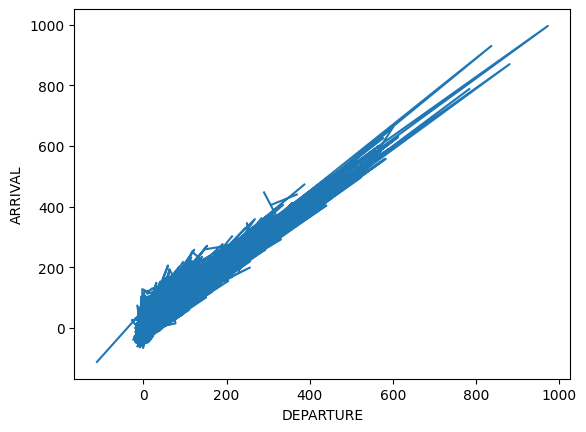

In [20]:
import matplotlib.pyplot as plt
plt.plot(data.dep_delay,data.arr_delay)
plt.xlabel("DEPARTURE")
plt.ylabel("ARRIVAL")



In [25]:
df = pd.read_csv('diabetes_model.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,5,77,82,41,42,35.8,0.156,35,0
1,9,122,56,0,0,33.3,1.114,33,1
2,0,113,76,0,0,33.3,0.278,23,1
3,1,139,62,41,480,40.7,0.536,21,0
4,10,161,68,23,132,25.5,0.326,47,1
...,...,...,...,...,...,...,...,...,...
609,4,114,64,0,0,28.9,0.126,24,0
610,2,175,88,0,0,22.9,0.326,22,0
611,3,121,52,0,0,36.0,0.127,25,1
612,7,136,74,26,135,26.0,0.647,51,0


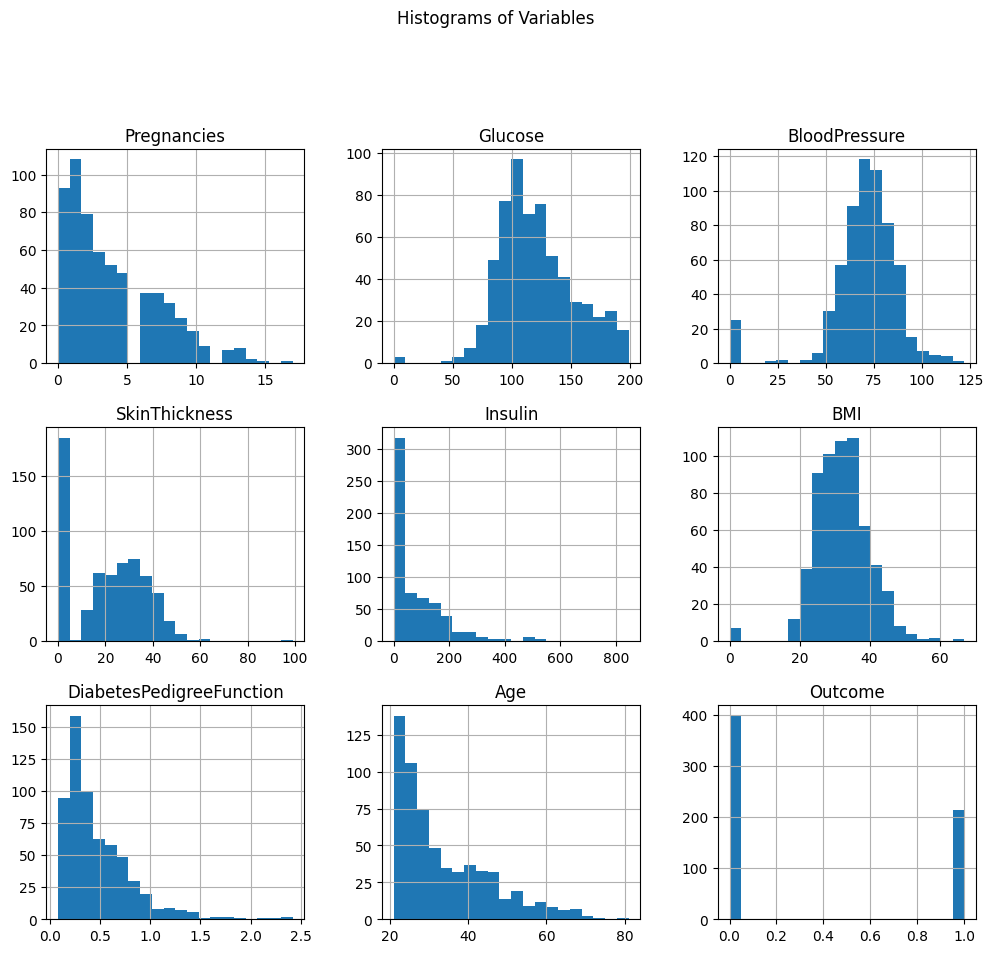

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
df.hist(figsize=(12, 10), bins=20)
plt.suptitle("Histograms of Variables", y=1.02)
plt.show()



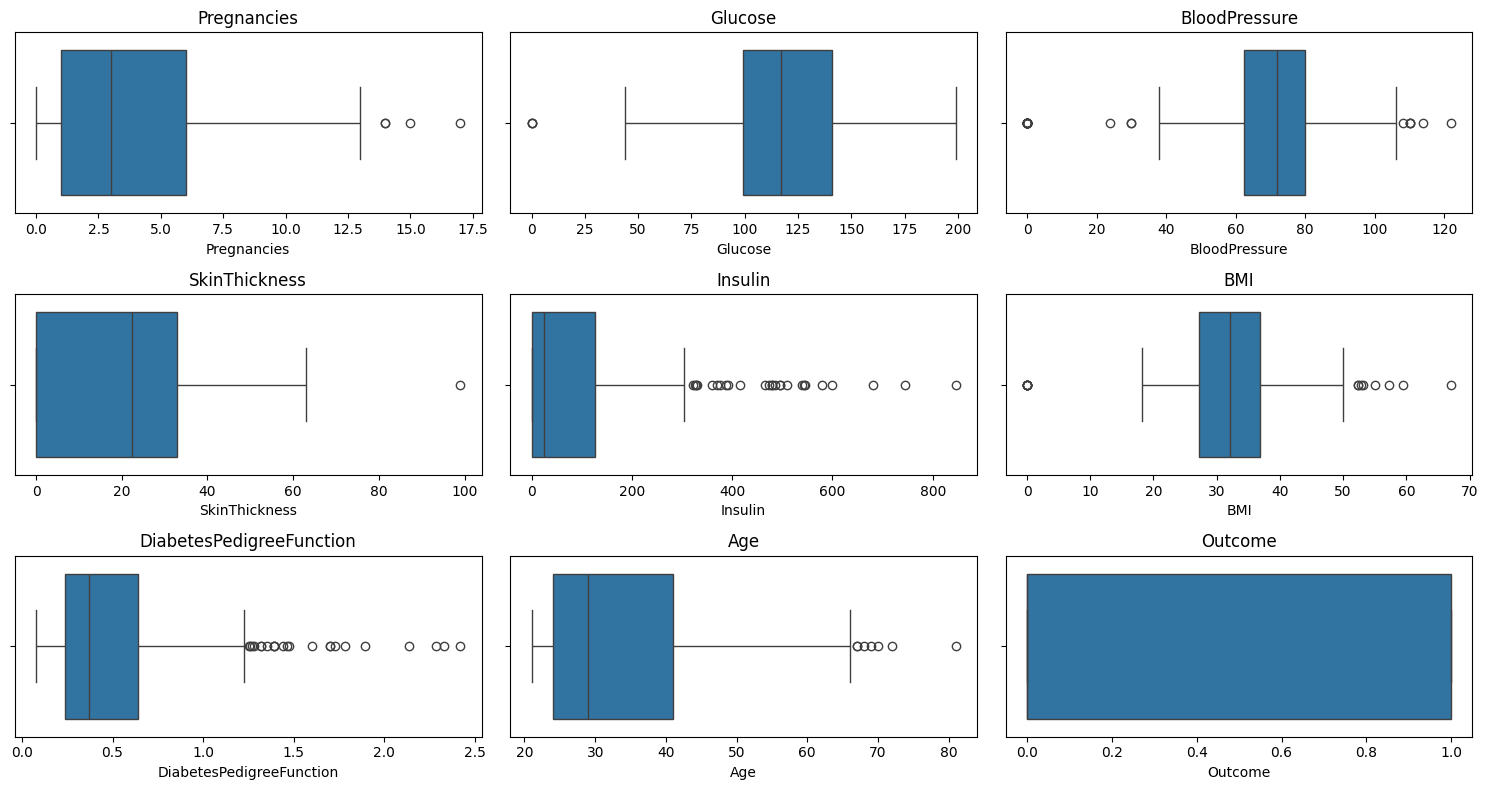

In [27]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(df.columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

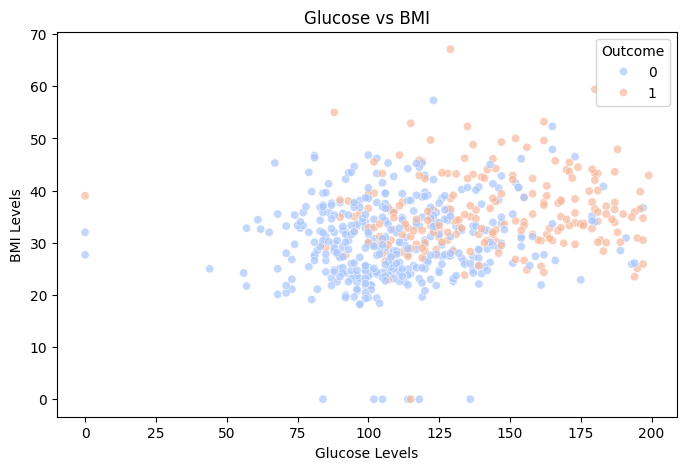

In [28]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Glucose"], y=df["BMI"], hue=df["Outcome"], palette="coolwarm", alpha=.7)
plt.title("Glucose vs BMI")
plt.xlabel("Glucose Levels")
plt.ylabel("BMI Levels")
plt.show()

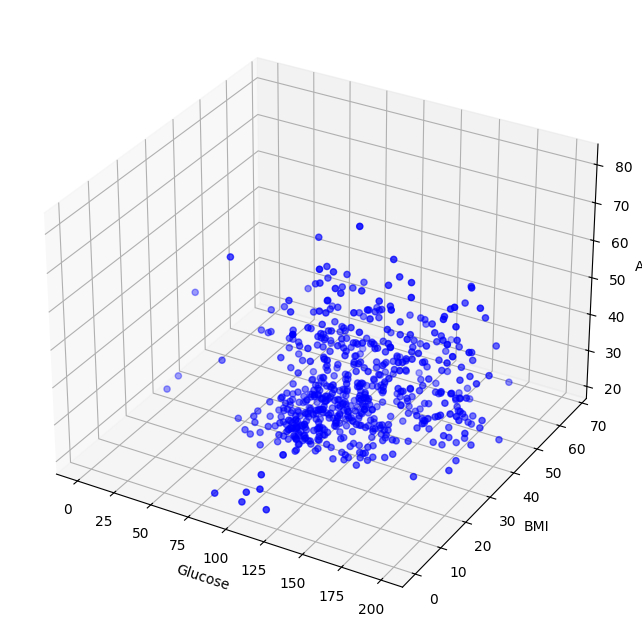

In [29]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Glucose'], df['BMI'], df['Age'], c='blue', marker='o')
ax.set_xlabel('Glucose')
ax.set_ylabel('BMI')
ax.set_zlabel('Age')

plt.show()